In [2]:
import seaborn as sns           # for plots
import matplotlib.pyplot as plt # for plotting graphs
import sys

sys.path.append('../src')

from preprocessing import load_data
from features import splitting_data, feature_engineering, scaling, add_constant_column
from models import train_model

## Model building

We decided to use a linear regression model for the following reasons:
- It's simple and easy to interpret.
- It goes well with visuals.
- The pattern is highly repeatable, such that we can use it to reliably predict future instances.
- It's transparent and gives us an idea as to which features are more or less relevant.

The formula for a linear regression model is given as follows:
<img src = "https://i.sstatic.net/25Kv6.png" 
     width = 400px, height=300px/>
where y (predictor) is the target we are trying to predict (in this case, life expectancy), the X's are our predictors (features such as GDP, levels of disease, etc), and the b's are our coefficients (how much our features are multipled by).
#### Model building - data sensitivity
Another concern we needed to consider was that some of the data we needed to analyse might be considered sensitive. Some countries might not be able/willing to show us some of the more private pieces of data around them, e.g. BMI, incidents of HIV, etc, due to the more private nature of those kinds of information.
To mitigate this concern, we seperated the featuires into 2 categories: sensitive and non-sensitive. We based non-sensitive data on the idea of the data not being considered private and geberally larger scale, examples including but not limited to:
- GDP
- level of education
- level of economic develeopment

Whereas the more personal private data was classed as sensitive, such as:
- BMI
- Incidents of HIV
- People classed as 'thin'

Our program gives you the option to use 1 of 2 models. One is for all data, regardless of sensitivity, and the other model is based soley on the data that is only considered non-sensitive. 
#### Model building - coefficients bar chart

We can visualise what the coefficients of the 2 models would look like with the following bar chart:

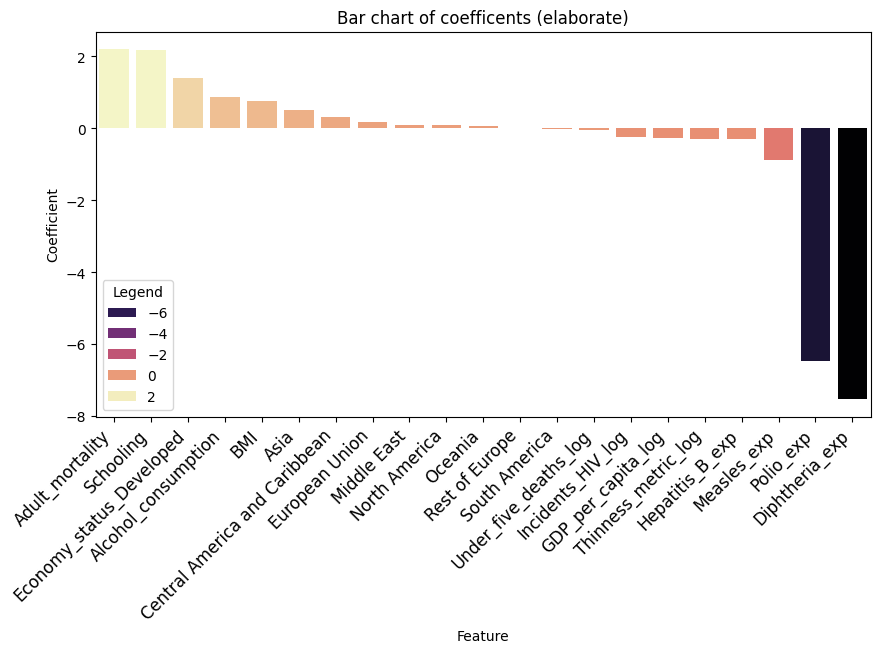

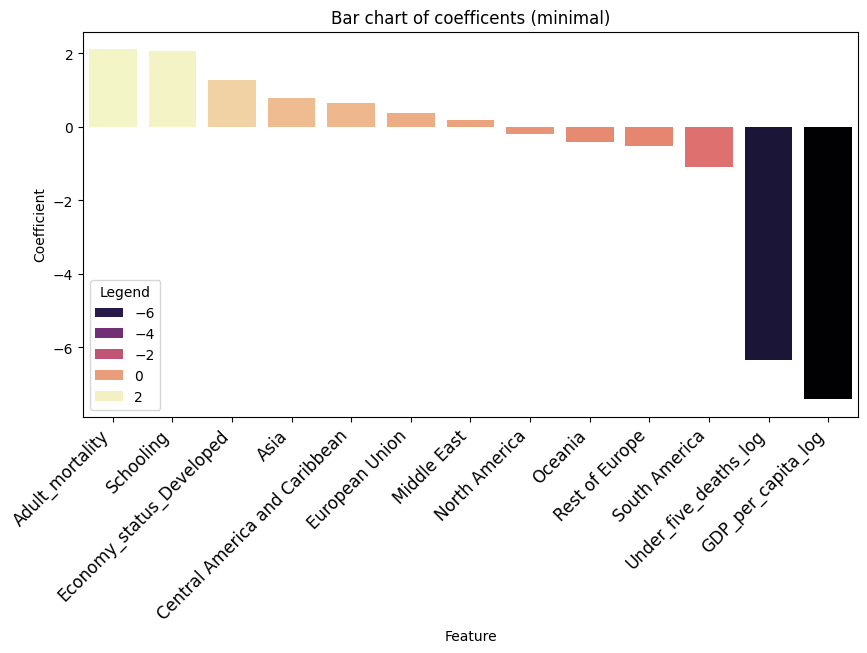

In [3]:
# runs the base data used throughout the model building section
df = load_data() # loads in the life expectancy data as a data frame
minimal_cols = ['Region',
                'Under_five_deaths',
                'Adult_mortality',
                'GDP_per_capita',
                'Schooling',
                'Economy_status_Developed',
                'Life_expectancy'
                ]
# defines the minimum columns for our model (considered the non-sensitive data)
elaborate_cols = minimal_cols + ['Alcohol_consumption',
                  'Hepatitis_B',
                  'Measles',
                  'BMI',
                  'Polio',
                  'Diphtheria',
                  'Incidents_HIV',
                  'Thinness_ten_nineteen_years',
                  'Thinness_five_nine_years',
                 ]
# defines the full set of columnbs, e=being all in the minimum plus the columns we consider sensitive.
df_m = df[minimal_cols].copy()
df_e = df[elaborate_cols].copy()

# We set up the data frame copies (one for minimal, and one for elaborate) as we don't want to alter the original data.

X_train_m, X_test_m, y_train_m, y_test_m = splitting_data(df_m, 'Life_expectancy')
X_train_e, X_test_e, y_train_e, y_test_e = splitting_data(df_e, 'Life_expectancy')

# We then use a function defined in the features file. This splits the data frame into an X and y split (X being our features, and y being our target of life expectancy), and then uses the train_test_split function to split these into a train and test split data set.

X_train_m_fe = feature_engineering(X_train_m)
X_train_m_fe, _ = scaling(X_train_m_fe)

# We then use the feature engineering and scaling functions, both of which are also defined in the features file. The feature engineering function drops irrelevant columns, one hot encodes the region, and transforms the more extreme columns. The scaling function uses gthe robust scaler function to scake the data such that our model is more reliable.

X_train_m_fe = add_constant_column(X_train_m_fe)

# Add a constant (intercept)

X_train_e_fe = feature_engineering(X_train_e)
X_train_e_fe, _ = scaling(X_train_e_fe)

# We then use the feature engineering and scaling functions, both of which are also defined in the features file. The feature engineering function drops irrelevant columns, one hot encodes the region, and transforms the more extreme columns. The scaling function uses gthe robust scaler function to scake the data such that our model is more reliable.

X_train_e_fe = add_constant_column(X_train_e_fe)

# Add a constant (intercept)

feature_cols_final_e = X_train_e_fe.columns
feature_cols_final_m = X_train_m_fe.columns

# Update feature_cols

elaborate_results = train_model(y_train_e, X_train_e_fe)
minimal_results = train_model(y_train_m, X_train_m_fe)

# This function is in the models file. This fits a model to it by way of the statsmodels package.

coefficients_e = elaborate_results.params
coefficients_e = coefficients_e.drop('const')
coefficients_e = coefficients_e.sort_values(ascending=False)

coefficients_m = minimal_results.params
coefficients_m = coefficients_m.drop('const')
coefficients_m = coefficients_m.sort_values(ascending=False)

# The params attribute are used to store the coefficients, so we can visualise them in a bar chart.
# Note: I dropped the const as I wanted to focus specifically on the feature based coefficients.

feature_cols_graph_e = feature_cols_final_e.drop('const')
feature_cols_graph_m = feature_cols_final_m.drop('const')

#feature_cols_graph_e = feature_cols_graph_e.sort_values(ascending=False)

# As mentioned before, the constant was dropped to exmaine the coefficients.

plt.figure(figsize = (10,5)) # setting the size of the output

sns.barplot(
             x = feature_cols_graph_e,
             y = coefficients_e,
             hue = coefficients_e,
             palette = 'magma' # setting the colours
           )

plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.legend(title='Legend')

plt.xticks(rotation = 45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'large',
          )

# The rotation was hard set to 45, so as to avoid the titles overlapping each other.

plt.title('Bar chart of coefficents (elaborate)')
plt.savefig('../visualisations/elaborate_corr', bbox_inches='tight')
plt.show()

#elab_pred = elaborate_results.predict(X_train_e_fe[X_train_e_fe.columns])
#elab_pred

plt.figure(figsize = (10,5)) # setting the size of the output

sns.barplot(
             x = feature_cols_graph_m,
             y = coefficients_m,
             hue = coefficients_m,
             palette = 'magma' # setting the colours
           )

plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.legend(title='Legend')

plt.xticks(rotation = 45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'large',
          )

# #The rotation was hard set to 45, so as to avoid the titles overlapping each other.

plt.title('Bar chart of coefficents (minimal)')
plt.savefig('../visualisations/minimal_corr', bbox_inches='tight')
plt.show()